In [7]:
!git clone https://github.com/maryhc/opinion.git
#%cd /content
#!git pull

Cloning into 'opinion'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 52 (delta 25), reused 41 (delta 14), pack-reused 0
Unpacking objects: 100% (52/52), done.


In [66]:
#https://medium.com/datos-y-ciencia/preprocesamiento-de-datos-de-texto-un-tutorial-en-python-5db5620f1767
import re, string, unicodedata
import nltk
from nltk import FreqDist
nltk.download('punkt')
import matplotlib.pyplot as plt
import numpy as np

!pip install contractions
import contractions
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [143]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

def replace_contractions(text):
    return contractions.fix(text)

In [50]:
#file_name = open('/content/opinion/corpus/tweets.txt').read()
#file_name_mod = file_name.replace(".txt","")
file_name_mod = "tweetsn.txt"
mod_file = open(file_name_mod,"w")
raw_file = open('/content/opinion/corpus/tweets.txt','r+')

for x in raw_file:
	xf = x.replace("!"," ")
	xf = x.lower()
	mod_file.write(xf)

In [51]:
pattern = r'''(?x)
              (?:[A-Z]\.)+
              | \w+(?:-\w+)*
              | \$?\d+(?:\.\d+)?%?
              | \.\.\.
              | [][.,;"'?():-_´]
'''              

In [77]:
sample = open('/content/tweetsn.txt').read()
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

#sample = remove_non_ascii(sample)
words = nltk.word_tokenize(sample)
words = remove_non_ascii(words)



['sera',
 'la',
 'verdad',
 'y',
 'si',
 'ella',
 'piloto',
 'el',
 'vuelo',
 'que',
 'trajo',
 'a',
 'en',
 'su',
 'huida',
 'de',
 'bolivia',
 'a',
 'mexico',
 'otra',
 'estrategia',
 'para',
 'evitar',
 'la',
 'justicia',
 'para',
 'los',
 'golpistas',
 'y',
 'masacradores',
 'te',
 'costara',
 'caro',
 'que',
 'tildes',
 'de',
 'golpistas',
 'a',
 'ddhh',
 'son',
 'pedofiladas',
 'seguis',
 'con',
 'tus',
 'pedofiladas',
 'y',
 'futurologo',
 'porque',
 'saber',
 'que',
 'iba',
 'a',
 'ser',
 'presidenta',
 'que',
 'lo',
 'pario',
 'tiene',
 'una',
 'constitucion',
 'moderna',
 'bolivia',
 'ojala',
 'los',
 'morenistas',
 'miserables',
 'tuvieran',
 'los',
 'pantalones',
 'de',
 'pronunciarse',
 'en',
 'contra',
 'del',
 'coqueteo',
 'de',
 'lopez',
 'con',
 'la',
 'izquierda',
 'miserable',
 'con',
 'dictadores',
 'como',
 'o',
 'bien',
 'por',
 'reconocer',
 'el',
 'error',
 'lilly',
 'ojala',
 'los',
 'morenistas',
 'miserables',
 'tuvieran',
 'los',
 'pantalones',
 'de',
 'pron

In [78]:
vocabulario = sorted(set(words))
print(vocabulario[1000:1050])

['alcaldia', 'alcaldias', 'alcamzo', 'alcance', 'alcano', 'alcantarilla', 'alcantarillado', 'alcanza', 'alcanzaba', 'alcanzan', 'alcanzando', 'alcanzaotra', 'alcanzaria', 'alcanzaron', 'alegra', 'alegran', 'alegre', 'alegremente', 'alegria', 'alejado', 'alejados', 'alejandra', 'alejate', 'alejen', 'alejese', 'alemania', 'alentar', 'alentarlas', 'alento', 'alerta', 'ales', 'alevoso', 'alex', 'alexis', 'alfa', 'alferez', 'alfombra', 'alfonsin', 'alfonsina', 'alfonso', 'alfredo', 'algido', 'algo', 'alguien', 'alguilar', 'alguito', 'algun', 'alguna', 'algunas', 'alguno']


In [55]:
#Riqueza lexica
rl = len(vocabulario)/len(words)
print(rl)

0.1075091428418889


In [56]:
def porcentaje_palabra(palabra, texto):
    return 100*texto.count(palabra)/len(texto)

In [57]:
porcentaje_palabra('golpista',words)

0.07421051226609007

In [6]:
#Diccionario
dic = {}
for palabra in set(words):
  dic[palabra] = words.count(palabra)
dic  

NameError: ignored

In [82]:
#FreqDist
fdist = FreqDist(words)
long_words = [palabra for palabra in words if len(palabra)>5]
#vocabulario_filtrado = sorted(set(long_words))
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(words) if len(palabra) > 5 and fdist[palabra]>10]
dtypes = [('Palabra','S10'),('Frecuencia',int)]
palabras_interesantes = np.array(palabras_interesantes, dtype = dtypes)
palabras_interesantes

array([(b'buenas',  12), (b'unidos',  15), (b'llunku',  11),
       (b'queremos',  43), (b'planta',  15), (b'perdio',  29),
       (b'desastre',  16), (b'cochabamba',  15), (b'escribiend',  11),
       (b'titere',  39), (b'violacione',  17), (b'exacto',  12),
       (b'significa',  19), (b'renunciast',  22), (b'salvar',  20),
       (b'peligroso',  14), (b'culpables',  11), (b'dejando',  11),
       (b'cohetes',  12), (b'argumento',  13), (b'nacional',  35),
       (b'solamente',  11), (b'importante',  33), (b'politica', 105),
       (b'tambien', 221), (b'semejante',  28), (b'excelente',  17),
       (b'verdadera',  25), (b'representa',  20), (b'gobierna',  11),
       (b'suficiente',  15), (b'julian',  17), (b'proceso',  47),
       (b'cometido',  19), (b'mandato',  27), (b'irregulari',  11),
       (b'jovenes',  17), (b'proteger',  16), (b'destruir',  22),
       (b'impuestos',  25), (b'humanidad',  31), (b'evitar',  17),
       (b'tratando',  14), (b'planes',  16), (b'ciudad',  14),

In [83]:
palabras_interesantes = np.sort(palabras_interesantes, order = 'Frecuencia')
palabras_interesantes

array([(b'andrade',  11), (b'aparato',  11), (b'apellido',  11),
       (b'apenas',  11), (b'armado',  11), (b'asuntos',  11),
       (b'aymara',  11), (b'bartolina',  11), (b'bartolinas',  11),
       (b'bastante',  11), (b'blanca',  11), (b'blancos',  11),
       (b'boludo',  11), (b'cancer',  11), (b'capitalism',  11),
       (b'capitulo',  11), (b'ciencia',  11), (b'cojudo',  11),
       (b'compatriot',  11), (b'conoce',  11), (b'conocer',  11),
       (b'conviene',  11), (b'correspond',  11), (b'crimen',  11),
       (b'cuentan',  11), (b'cuestion',  11), (b'cuidar',  11),
       (b'culpables',  11), (b'defenderse',  11), (b'dejando',  11),
       (b'democratic',  11), (b'despreciab',  11), (b'enganar',  11),
       (b'escriben',  11), (b'escribiend',  11), (b'esperando',  11),
       (b'esperanza',  11), (b'esposos',  11), (b'estimado',  11),
       (b'fiscal',  11), (b'fracaso',  11), (b'gobernante',  11),
       (b'gobierna',  11), (b'guerriller',  11), (b'habrian',  11),
     

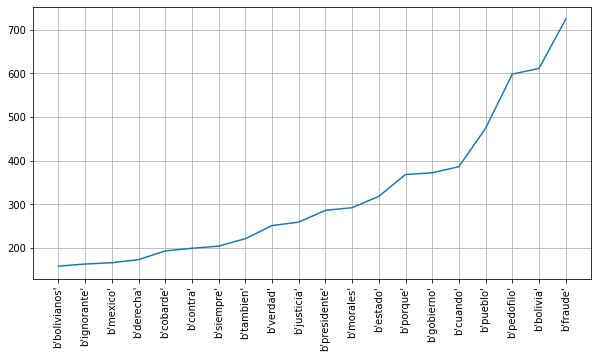

In [85]:
top_words = 20
x = np.arange(len(palabras_interesantes[-top_words:]))
y = [freq[1] for freq in palabras_interesantes[-top_words:]]
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xticks(x,[str(freq[0]) for freq in palabras_interesantes[-top_words:]], rotation = 'vertical')
plt.grid(True)
plt.show()

In [145]:
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('spanish'):
            new_words.append(word)
    return new_words

def stem_words(words):
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    #words = remove_stopwords(words)
    return words

In [ ]:
words = normalize(words)
print(len(words))

14926


In [ ]:
print(len(words))


14926


In [ ]:
flatten = [w for l in words for w in l]
print(len(flatten))

71078


In [ ]:
arr = [w for w in words if re.search('pedofilo',w)]
print(len(arr))

59
